### Eurovision Statistics Visualization
--------------------------------------
* Created by Ege - 2021 


In [156]:
#Import libraries. Install them if you haven't already

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [157]:
link = "http://www.escstats.com/{}.htm"

#### Extracting participant countries from Wikipedia 

In [158]:
wiki ="https://en.wikipedia.org/wiki/List_of_countries_in_the_Eurovision_Song_Contest"
df = pd.read_html(wiki, header=0)

countries = df[1] #Creating the variable for the table we need from the link

c_names = countries["Country"].tolist() #Save country names to the c_names list 

#### Formating the data from the list

* Our aim is to extract country names in escstats.com 's url format. 
* We need to do some data cleaning and formating 

In [160]:
#print(c_names)
#c_names = [i.lower() for i in c_names  ] #Lower all of the items 

#for i in c_names:
#    if i[-1] == "†":
#        print(i)
  

#### We are going to visualize points extracting the "Charts" table from the website
##### Defining the function to visualize points by year data for individual countries

In [93]:
def points_graph(country):
    
    source = link.format(country) #Create the link according to given country
    
    df = pd.read_html(source, header = 0)

    #There are 6 tables in the website 
    charts = df[5] #We will need the last one
    
    charts = charts.sort_values(by ="YEAR", ascending=True) #Sort values by year
    
    #Create graph
    plt.figure(figsize=(14,7),dpi=150)
    plt.plot(charts.YEAR, charts.POINTS, "r-o", label=country.capitalize()) 
    
    plt.xticks(np.arange(1956,2018,5)) #We have data from 1956 to 2017 . Arranging ticks according to that
    plt.tick_params(axis="both",labelsize="10")
    
    plt.title(country.capitalize() +": Eurovision Points by Year", fontdict={"fontsize":"18"})
    plt.xlabel("Year", fontdict={"fontsize":"16"})
    plt.ylabel("Points", fontdict={"fontsize":"16"})
    plt.legend()
    return plt.show()
    


### Data Visualization: Line Plot for Points by Year
-----------------------------
* Play here with points_graph function as you wish

In [161]:
#points_graph("turkey")

### Compare Two Countries
------------------------------
#### Define a function to compare two given countries

In [178]:
def compare_two(c1,c2):
    
    s1 = link.format(c1) 
    s2 = link.format(c2)
    
    df1 = pd.read_html(s1, header=0)
    df2 = pd.read_html(s2, header=0)
    
    charts1 = df1[5]
    charts2 = df2[5]
    
    charts1 = charts1.sort_values(by ="YEAR", ascending=True) 
    charts2 = charts2.sort_values(by ="YEAR", ascending=True)
    
    #Create graph
    plt.figure(figsize=(14,7),dpi=150)
    plt.plot(charts1.YEAR, charts1.POINTS, "r-o", label=c1.capitalize()) 
    plt.plot(charts2.YEAR, charts2.POINTS, "b-o", label=c2.capitalize()) 
    
    plt.xticks(np.arange(1956,2018,5))
    plt.tick_params(axis="both",labelsize="10")
    
    plt.title(c1.capitalize() +" vs " + c2.capitalize() + ": Eurovision Points by Year", fontdict={"fontsize":"18"})
    plt.xlabel("Year", fontdict={"fontsize":"16"})
    plt.ylabel("Points", fontdict={"fontsize":"16"})
    plt.legend()
    return plt.show()
    

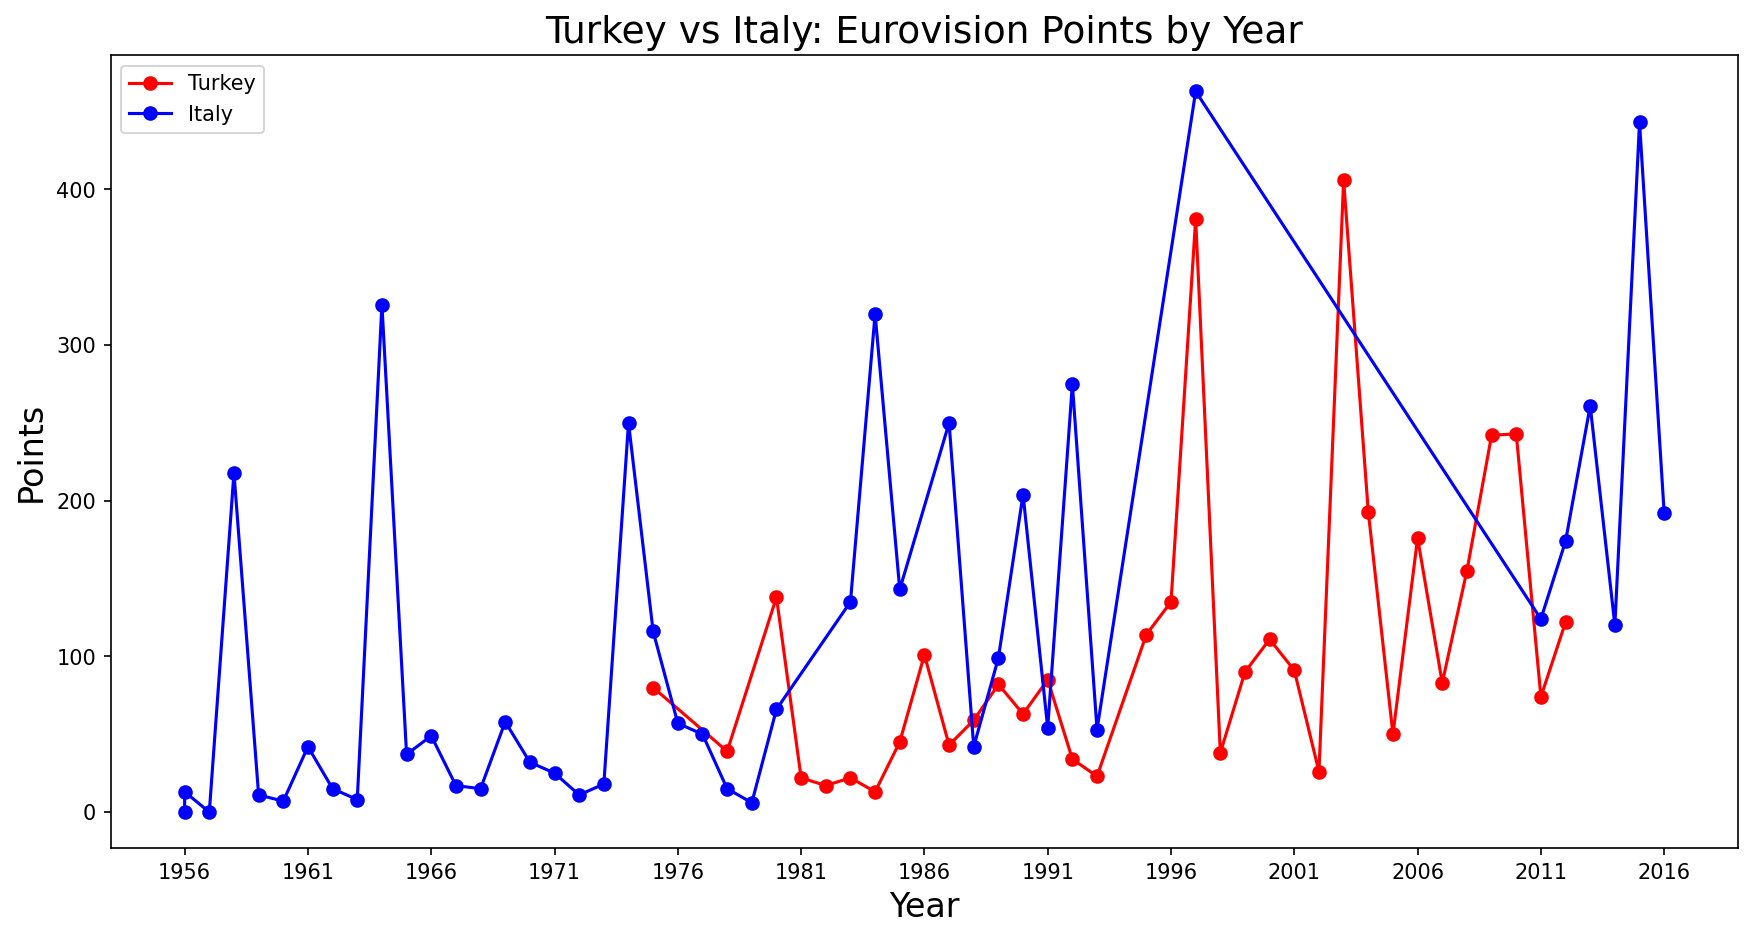

In [179]:
compare_two("turkey","italy")

### 